In [5]:
import tifffile
import numpy
import matplotlib.pyplot as plt
from pathlib import Path

In [4]:
data_dir = "/data/Experiment_data/VIB/Vulcan/Slava_PBMC/images_subset/"

In [9]:
data = [tifffile.imread(str(p), key=[0, 1, 2, 3]) for p in Path(data_dir).glob("*.tif*")]

In [44]:
data[0].reshape(data[0].shape[0], -1).shape

(4, 2600)

In [25]:
mins = numpy.array([numpy.min(d.reshape(d.shape[0], -1), axis=1) for d in data])
mins = mins.min(axis=0)
mins

array([ 0.03757787, -0.06986801, -0.06328143, -0.82729447], dtype=float32)

In [54]:
maxs = numpy.array([numpy.max(d.reshape(d.shape[0], -1), axis=1) for d in data])
maxs = maxs.max(axis=0)
maxs

array([0.17129806, 0.53780985, 0.5499696 , 1.969135  ], dtype=float32)

In [55]:
data_norm = [(d - mins[..., numpy.newaxis, numpy.newaxis]) / (maxs - mins)[..., numpy.newaxis, numpy.newaxis] for d in data]

In [60]:
data_norm[0][0].max()

0.9558297

In [67]:
[d[1].min() for d in data]

[-0.04673039,
 -0.033662945,
 -0.058347005,
 -0.04272941,
 -0.036501385,
 -0.034922514,
 -0.04630452,
 -0.069868006,
 -0.047626425,
 -0.041282546,
 -0.06360486]

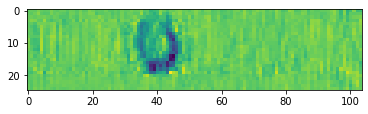

In [57]:
plt.imshow(data_norm[0][0])

In [64]:
[d[0].min() for d in data_norm]

[0.14982076,
 0.098281026,
 0.5207257,
 0.14621371,
 0.009087946,
 0.21554562,
 0.2608311,
 0.16090503,
 0.31932825,
 0.13576713,
 0.0]

In [65]:
[d[0].max() for d in data_norm]

[0.9558297,
 0.92610264,
 0.87363416,
 0.91583365,
 0.92195165,
 0.89476764,
 0.9160683,
 1.0,
 0.8917083,
 0.9097691,
 0.9225564]